In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *
from visuals import *
from dataset import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df["bboxes"] = df["bboxes"].apply(eval)

In [6]:
index = 90

In [7]:
img_path = df.filename[index]

In [8]:
bboxes = df.bboxes[index]

In [9]:
for b in bboxes:
    print(b)

[1429, 419, 1629, 613]
[331, 1092, 536, 1297]
[1404, 2495, 1604, 2689]
[2517, 2510, 2712, 2704]
[3535, 1816, 3735, 2011]


(3024, 4032, 3)


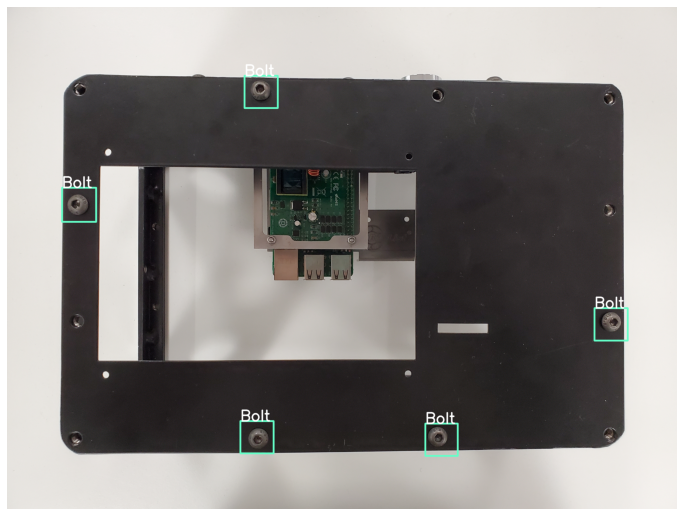

In [10]:
img = visualize_bbox_with_df(df, 90)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

In [11]:
img_original = img.copy()

In [12]:
transform = A.Compose([
    #A.RandomSizedCrop(min_max_height=(1800, 2800), height=1524, width=1524, p=0.5),
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.OneOf([
        A.MotionBlur(p=.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.RandomBrightnessContrast(),            
    ], p=0.3),
    A.HueSaturationValue(p=0.3),
    A.RGBShift(),
    A.Blur(),
    A.OneOf([
        A.HueSaturationValue(hue_shift_limit=0.4, sat_shift_limit= 0.2, 
                             val_shift_limit=0.2, p=0.9),
        A.RandomBrightnessContrast(brightness_limit=0.2, 
                                   contrast_limit=0.5, p=0.9),
    ],p=0.9),
    A.ToGray(p=0.01),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Cutout(num_holes=8, max_h_size=164, max_w_size=164, fill_value=0, p=0.5),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))

/home/astamoulakatos/.conda/envs/deep/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


In [13]:
index = 90

In [14]:
img = cv2.imread(df.filename[index])
img = img.transpose(1,0,2)
img = np.flipud(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

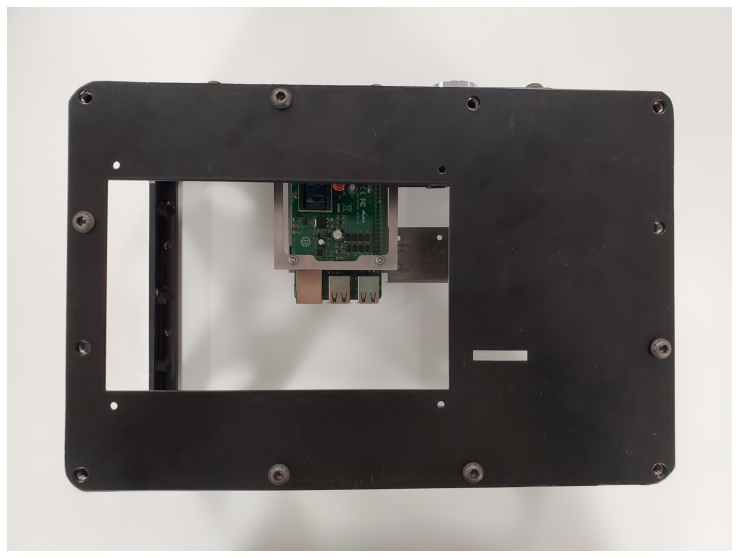

In [15]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
transformed = transform(image=img, bboxes=bboxes, class_labels=['Bolt']*len(bboxes))
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']

In [17]:
img_aug = transformed['image']

In [18]:
transformed['bboxes']

[(1429.0, 418.99999999999994, 1629.0, 613.0000000000001),
 (331.0, 1092.0000000000002, 536.0, 1297.0),
 (1404.0, 2495.0, 1604.0, 2689.0),
 (2517.0, 2510.0, 2712.0, 2704.0),
 (3535.0, 1816.0000000000002, 3735.0, 2011.0000000000002)]

In [19]:
img = visualize_bbox(img_aug.cpu().permute(1,2,0).numpy(), transformed['bboxes'])

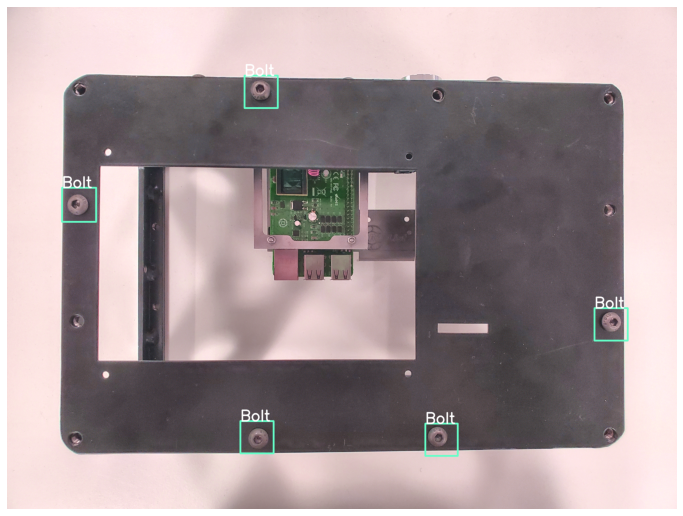

In [20]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

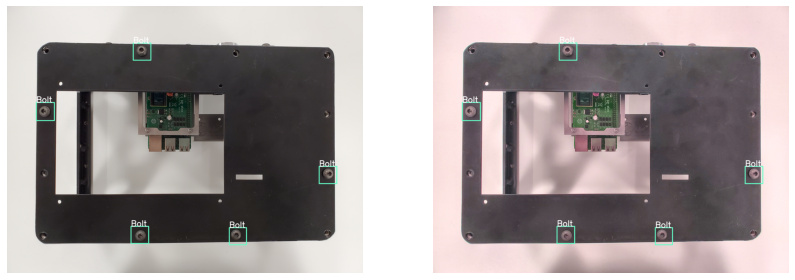

In [21]:
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
df = pd.read_csv('dataset_strat.csv')

In [23]:
df["bboxes"] = df["bboxes"].apply(eval)

In [24]:
transform = A.Compose([
    #A.RandomSizedCrop(min_max_height=(1800, 2800), height=1524, width=1524, p=0.5),
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.OneOf([
        A.MotionBlur(p=.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.RandomBrightnessContrast(),            
    ], p=0.3),
    A.HueSaturationValue(p=0.3),
    A.RGBShift(),
    A.Blur(),
    A.OneOf([
        A.HueSaturationValue(hue_shift_limit=0.4, sat_shift_limit= 0.2, 
                             val_shift_limit=0.2, p=0.9),
        A.RandomBrightnessContrast(brightness_limit=0.2, 
                                   contrast_limit=0.5, p=0.9),
    ],p=0.9),
    A.ToGray(p=0.01),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    #A.Resize(height=1024, width=1024, p=1),
    A.Cutout(num_holes=8, max_h_size=164, max_w_size=164, fill_value=0, p=0.5),
    #A.Normalize(),
    #ToTensorV2(),
], bbox_params=A.BboxParams(format="pascal_voc", min_area=0, min_visibility=0, label_fields=['labels']))

In [25]:
dataset = BoltDataset(df, transform, 'train')

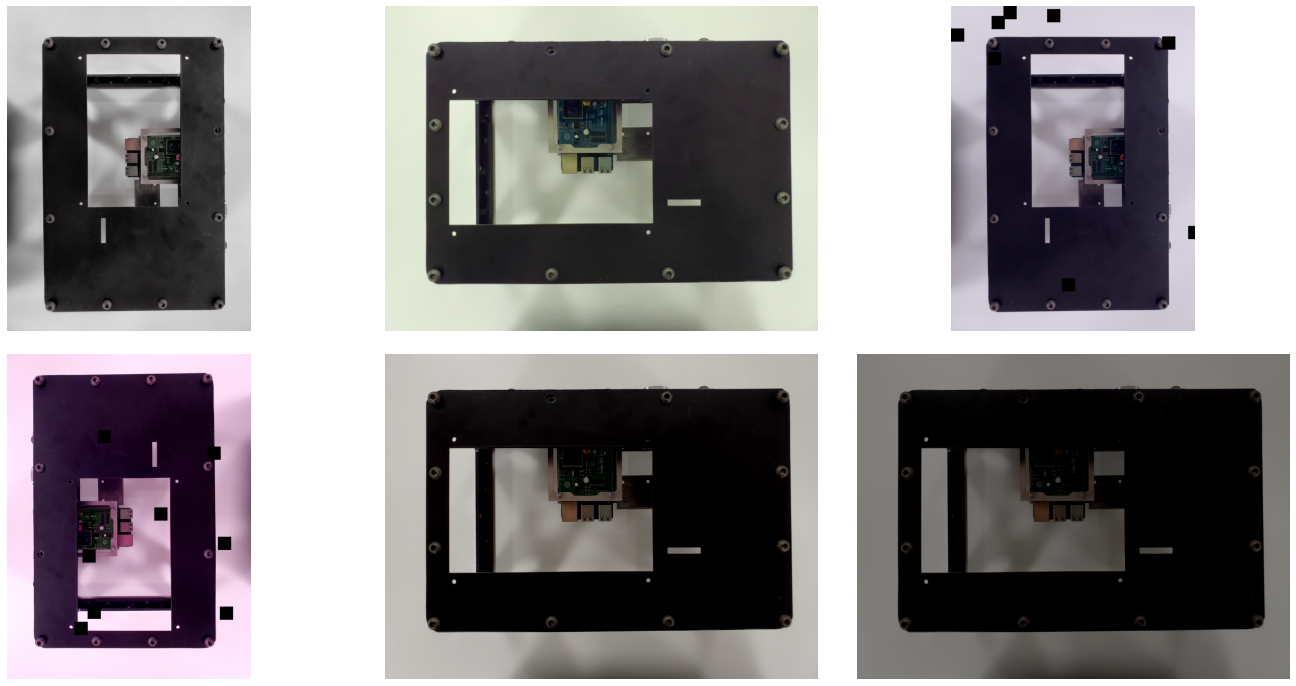

In [26]:
random.seed(50)
visualize_augmentations(dataset, idx=40)